# PYTHON ASSIGNMENT 3

### Google play store analysis
##### Import the packages

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [140]:
g_data=pd.read_csv('playstore-analysis (2).csv')
g_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 1. Data clean up – Missing value treatment
#### a.Drop records where rating is missing since rating is our target/study variable

In [141]:
g_data.shape

(10841, 13)

In [142]:
g_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [143]:
g_data=g_data.dropna(subset=['Rating'])

In [144]:
g_data.shape

(9367, 13)

In [145]:
g_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

#### b.Check the null values for the Android Ver column. 
##### ⦁	Are all 3 records having the same problem?


No Third row also includes null value inn Content Rating , So this record is not useful we an drop it.

In [146]:
(g_data[g_data['Android Ver'].isnull()])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##### ⦁	Drop the 3rd record i.e. record for “Life Made WIFI …”


In [147]:
g_data=g_data.drop((g_data[g_data['Android Ver'].isnull()]).index[2])

In [148]:
(g_data[g_data['Android Ver'].isnull()])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


##### ⦁	Replace remaining missing values with the mode


In [149]:
g_data['Android Ver']= g_data['Android Ver'].fillna(g_data['Android Ver'].mode().iloc[0])


In [150]:
g_data['Android Ver'].isnull().sum()

0

#### c. Current ver – replace with most common value

In [151]:
g_data['Current Ver']= g_data['Current Ver'].fillna(g_data['Current Ver'].mode().iloc[0])



In [152]:
g_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 2. Data clean up – correcting the data types
#### ⦁	Which all variables need to be brought to numeric types?


In [153]:
g_data.dtypes  # Displaying Data types of each feature.


App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Here Reviews , Installs , Price , Android Ver need to be converted to numeric or else float
#### a. Reviews  column must be of numerical type. So we should change it.


In [154]:
g_data.Reviews = g_data.Reviews.astype('int64') 


In [155]:
g_data.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

#### b. Installs – remove ‘,’ and ‘+’ sign, convert to integer


In [156]:
conv_installs=[]

for x in g_data.Installs:
    x = x[:-1]
    y = x.replace(",", "")
    conv_installs.append(int(y))

g_data.Installs = conv_installs
g_data.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

####  c. Price variable – remove $ sign and convert to float

In [157]:
conv_price=[]

for x in g_data.Price:
    if x!= "0":
        y = float(x[1:])
    else:
        y = 0 
        
    conv_price.append(y)
        
g_data.Price = conv_price

g_data.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

####  c. Android Ver variable –  convert to float


In [158]:
android_conv = []

for x in g_data['Android Ver']:
    try:
        y = float(x[:2])
    except:
        y = 0  
    
    android_conv.append(y)
    
g_data['Android Ver'] =  android_conv

g_data['Android Ver'].value_counts()

4.0    5861
0.0    1319
2.0    1177
5.0     556
3.0     250
1.0     105
6.0      48
7.0      45
8.0       5
Name: Android Ver, dtype: int64

### 3.	Sanity checks – check for the following and handle accordingly
#### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
####                                i.  Are there any such records? Drop if so.



In [192]:
g_data=g_data[g_data['Rating'].between(1,5,inclusive=True)]


print('Rating count which are given in range of 1 and 5 is',g_data.Rating.count())       

Rating count which are given in range of 1 and 5 is 7169


#### b.	Reviews should not be more than installs as only those who installed can review the app.
#### i.	Are there any such records? Drop if so.


In [160]:
g_data=g_data[g_data['Reviews']<=g_data['Installs']]


In [161]:
g_data.Reviews.count()

9359

### 4.	Identify and handle outliers – 
#### a.	Price column
##### i.	Make suitable plot to identify outliers in price


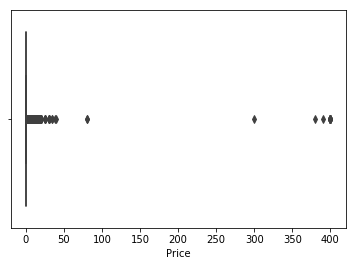

In [162]:

sns.boxplot(x=g_data['Price'])

##### ii.	Do you expect apps on the play store to cost $200? Check out these cases

In [170]:
g_data=g_data[g_data['Price'] < 200]


In [171]:
gh.Price.count()

9344

##### iii.	After dropping the useless records, make the suitable plot again to identify outliers

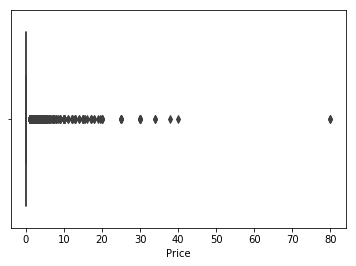

In [172]:
sns.boxplot(x=g_data['Price'])

##### iv.	Limit data to records with price < $30

In [173]:
g_data=g_data[g_data['Price'] < 30]


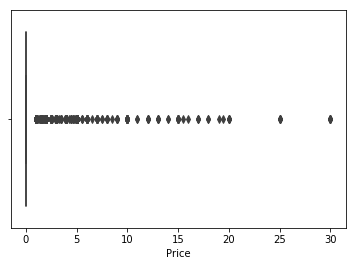

In [174]:
sns.boxplot(x=g_data['Price'])

#### b.	Reviews column
##### i.	Make suitable plot


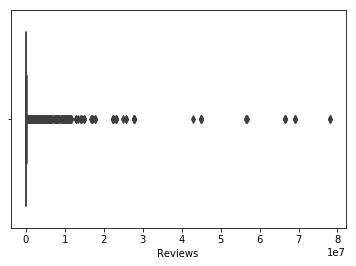

In [175]:
sns.boxplot(g_data['Reviews'])

##### ii.	Limit data to apps with < 1 Million reviews


In [179]:
g_data=g_data[g_data['Reviews']<100000]

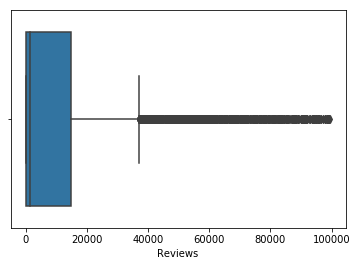

In [181]:
sns.boxplot(g_data.Reviews)

#### c.	Installs
##### i.	What is the 95th percentile of the installs?


In [182]:
g_data.Installs.quantile(0.95)

5000000.0

##### ii.	Drop records having a value more than the 95th percentile

In [184]:
g_data=g_data[g_data.Installs<=g_data.Installs.quantile(0.95)]

### 5.	What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
#### a.	How do you explain this?


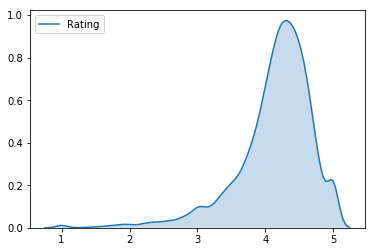

In [193]:
sns.kdeplot(shade=True,data=g_data['Rating'])


#### This Distribution diagram shows that Ratings are skewwd towards higher values.
### Insight : Most of the apps, clearly hold a rating above 4.0 ! And surprisingly a lot seem to have 5.0 rating.¶


In [194]:
from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)
print( 'excess kurtosis of  distribution : {}'.format( kurtosis(g_data['Rating']) ))
print( 'skewness of distribution: {}'.format( skew(g_data['Rating']) ))

excess kurtosis of  distribution : 4.289035959351656
skewness of distribution: -1.5907248688226023


#### b.	What is the implication of this on your analysis?

In [196]:
g_data.Rating.describe()

count    7169.000000
mean        4.136142
std         0.563187
min         1.000000
25%         3.900000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [272]:
print("No. of Apps with full ratings: ",g_data.Rating[g_data['Rating'] == 5 ].count())


No. of Apps with full ratings:  268


###### Rating is  Left skewed(Negatively skewed) and median value is around 4.3 from discriptive analysis and density plot Kurtosis is around 4.3 that means data is above normal distribution this a actually a good this a rating is above 4 thats a good indication that most of the apps are liked by users
#### There are 268 Apps in the store which hold 5.0 Ratings. Do all of these actually deserve it? Or are these spammed ratings? Lets analyze furthur

### 6.	What are the top Content Rating values?


In [240]:
g_data['Content Rating'].value_counts()

Everyone        5918
Teen             690
Mature 17+       330
Everyone 10+     227
Name: Content Rating, dtype: int64

In [241]:
g_data['Content Rating'].value_counts().max()

5918

As we can see here the content which is watched by Everyone has more values.

#### a.	Are there any values with very few records?


In [201]:
g_data['Content Rating'].value_counts()

Everyone           5918
Teen                690
Mature 17+          330
Everyone 10+        227
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Yes there are some content Rating values which are of very less records
Those are 'UNRATED' and 'Adults only 18+'.


We will drop those records as they are not useful.

#### b.	If yes, drop those as they won’t help in the analysis

In [230]:
new=g_data[g_data['Content Rating']!='Adults only 18+']


In [231]:
new=new[new['Content Rating']!='Unrated']
g_data=new

In [232]:
g_data['Content Rating'].value_counts()

Everyone        5918
Teen             690
Mature 17+       330
Everyone 10+     227
Name: Content Rating, dtype: int64

### 7.	Effect of size on rating
#### a.	Make a joinplot to understand the effect of size on rating


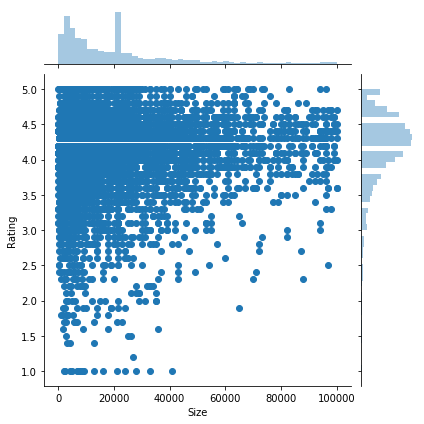

In [244]:
sns.jointplot(x ='Size', y ='Rating', data = g_data) 


#### b.	Do you see any patterns?


Yes,here from the above joinplot we can see the pattern clearly as Less Sized apps have more no of ratings and mostly towards 4-5.



#### c.	How do you explain the pattern?


Here size and rating are proprtional.
we can see the pattern clearly as Less Sized apps have more no of ratings and mostly between 4-5.

And we can see the  mean line in the figure which is aroound 4.3

### 8.	Effect of price on rating
#### a.	Make a jointplot (with regression line)


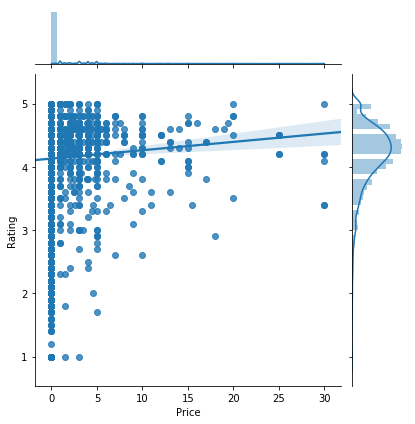

In [250]:
sns.jointplot(x='Price',y='Rating',data=g_data,kind='reg')

### b.	What pattern do you see?


The pattern we can see here is Free apps got more no of ratings and as price gets incresed , the number of users get decreased as here there are les number of ratings given.

### c.	How do you explain the pattern?


As Price is low like free apps and low priced apps , they've more no of ratings compared to paid app.
and here free apps are dominating, as more no of users prefer free apps rather than paid one.

### d.	Replot the data, this time with only records with price > 0 

In [254]:
fge=g_data[g_data['Price']!=0]


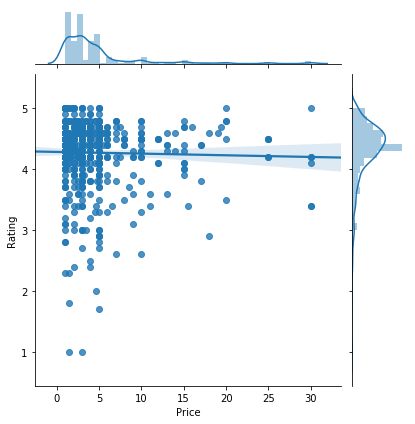

In [255]:
sns.jointplot(x='Price',y='Rating',data=fge,kind='reg')

### e.	Does the pattern change?


Yes , pattern has changed compared to previous ones. Observe at price 0.

### f.	What is your overall inference on the effect of price on the rating


From the inference we can justify that when the apps are free of cost then it will easy for them to easily download 
them and rate them.So when apps are of paid only some users will be able to use them and rate them.

### 9.	Look at all the numeric interactions together – 
#### a.	Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'


In [269]:
numeric_col=g_data.loc[ : , ['Reviews', 'Size', 'Rating', 'Price'] ]

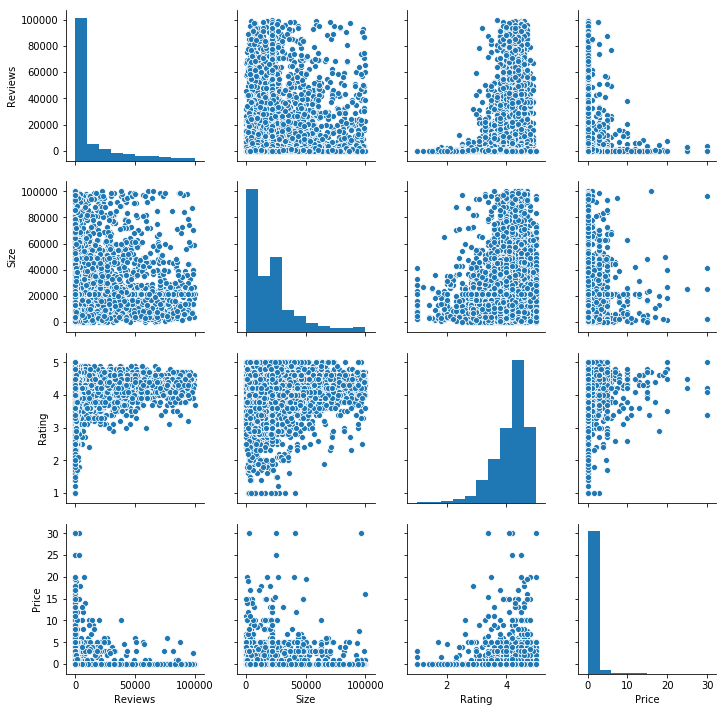

In [270]:
sns.pairplot(numeric_col)

In [266]:
numeric =g_data.loc[ : , ['Reviews', 'Size', 'Rating', 'Price','Type'] ]

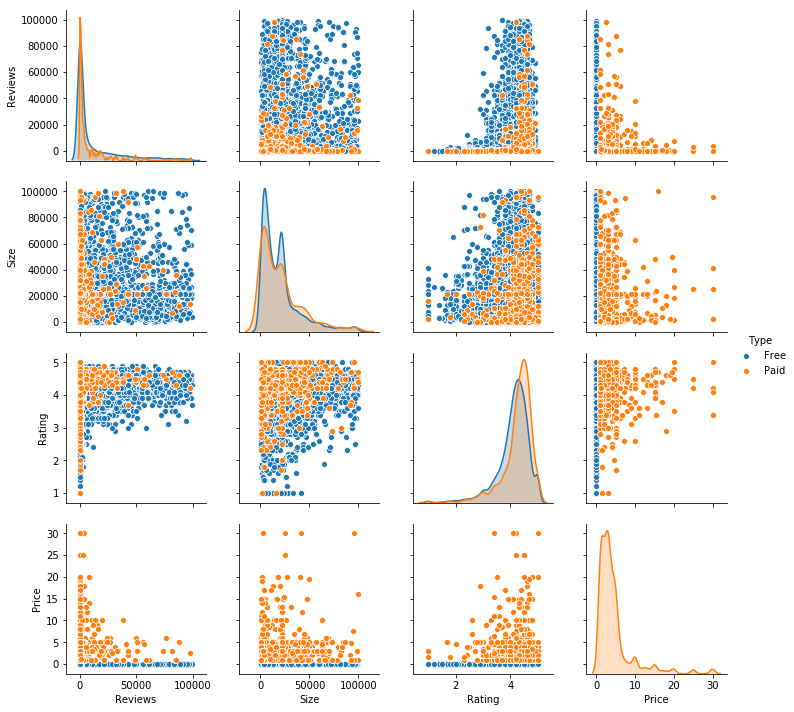

In [267]:
sns.pairplot(numeric,hue='Type')

### 10.	Rating vs. content rating
#### a.	Make a bar plot displaying the rating for each content rating


In [278]:
means=g_data.Rating.mean()

Text(0.5, 1.0, 'Rating per content rating\n')

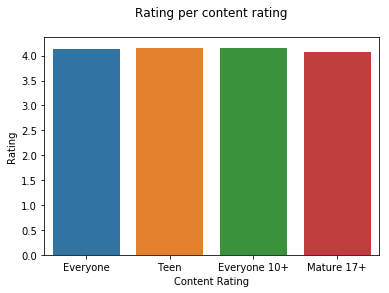

In [296]:
sns.barplot(x='Content Rating', y='Rating', data=g_data,ci=None)
plt.title('Rating per content rating\n')

#### b.	Which metric would you use? Mean? Median? Some other quantile?

In [ ]:
I have used mean.

#### c.	Choose the right metric and plot

Text(0.5, 1.0, 'Rating per content rating\n')

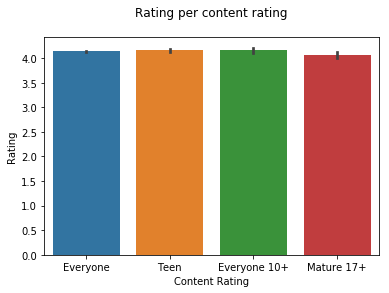

In [297]:
sns.barplot(x='Content Rating', y='Rating', data=g_data,estimator=np.mean)
plt.title('Rating per content rating\n')

### 11.	Content rating vs. size vs. rating – 3 variables at a time
#### a.	Create 5 buckets (20% records in each) based on Size


In [308]:
g_data.describe()

,Rating,Reviews,Size,Installs,Price,Android Ver
count,7165.000000,7165.000000,7165.000000,7.165000e+03,7165.000000,7165.000000
mean,4.136078,12505.000000,19827.390427,1.129054e+06,0.388607,3.391626
std,0.563287,21681.230591,19764.444462,4.496786e+06,1.891210,1.379695
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000,0.000000
25%,3.900000,82.000000,5100.000000,1.000000e+04,0.000000,3.000000
50%,4.200000,1279.000000,15000.000000,1.000000e+05,0.000000,4.000000
75%,4.500000,14807.000000,25000.000000,1.000000e+06,0.000000,4.000000
max,5.000000,99559.000000,100000.000000,1.000000e+08,29.990000,8.000000


In [305]:
g_data['binn'] = pd.cut(g_data.Size, [0,20000,40000,60000,80000,100000])


In [307]:
g_data.loc[ : , ['Size', 'binn'] ]

,Size,binn
0,19000.000000,"(0, 20000]"
1,14000.000000,"(0, 20000]"
2,8700.000000,"(0, 20000]"
4,2800.000000,"(0, 20000]"
5,5600.000000,"(0, 20000]"
6,19000.000000,"(0, 20000]"
7,29000.000000,"(20000, 40000]"
8,33000.000000,"(20000, 40000]"
9,3100.000000,"(0, 20000]"
10,28000.000000,"(20000, 40000]"
